<a href="https://colab.research.google.com/github/division-zero/Data-602assignments/blob/main/assignment_10_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**

In [54]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
import matplotlib.pyplot as plt


In [55]:
# Load datasets here once and assign to variables iris and boston
#no boston

from sklearn.datasets import load_iris

# Load the Iris dataset
irisdata = load_iris()

iris = pd.DataFrame(irisdata.data, columns=irisdata.feature_names) #feature_names contains the column info
iris['target'] = irisdata.target #species assigned to
print(iris.head()) #data frame
iris['target'].unique() #species was assigned a number

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


array([0, 1, 2])

**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [56]:
row_1to5 = iris.head(5) #assigning the first five rows to a variable

target_names = iris_data.target_names.tolist() #target_names contains the names.  put in list

print(row_1to5)
print(target_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [62]:
target_map = {index: species for index, species in enumerate(irisdata.target_names)} #collect the species, assign the numbers to the species


iris['species'] = iris['target'].map(target_map) #create a new column called species that uses the target column to determine the species

In [63]:
from sklearn.neighbors import KNeighborsClassifier #for building a knn model
x = irisdata.data # predictors
y = irisdata.target #target output for training


knn = KNeighborsClassifier(n_neighbors=5) # 5 nearest neighbors
knn.fit(x, y) #store fit into knn



KNeighborsClassifier()

In [72]:
versicolordata = iris[iris['species'] == 'versicolor'] #select the veriscolor values


average_versicolor = versicolordata.iloc[:, :-1].mean() # average value of the columns for versicolor

print(average_versicolor)
#copying output
test_observation = np.array([5.936, 2.77, 4.26, 1.326]).reshape(1, -1) #requested a reshape

#test the model
testpredict = knn.predict(test_observation) #just want to see if it works
predicted = [irisdata.target_names[testpredict]] #look up the target value and pull its name
print(predicted) #predicts veriscolor at least






sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4.260
petal width (cm)     1.326
target               1.000
dtype: float64
[array(['versicolor'], dtype='<U10')]
[array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#trying the top 5
#should be setosa for all
fiveobs = row_1to5.drop(columns=['target'])#remove the target previously trained without target
predict_rows = knn.predict(fiveobs) #set the predictions target output
predicts = [irisdata.target_names[predict_rows]] #convert target output to species name
print(predicts) #predicts setosa for all

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [97]:
 from sklearn.model_selection import train_test_split #split train and test data
 from sklearn.metrics import accuracy_score #compute accuracy


split = 0.8
neighbors = 5  #assuming it it requesting a parameter called neighbors
#based on the next question it wants us to build a function
def kmodel( split, neighbors):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split, random_state=2)


  knn = KNeighborsClassifier(n_neighbors=neighbors) #number of neighbors to the function parameter neighbors
  knn.fit(x_train, y_train)

# Predict the test set
  y_pred = knn.predict(x_test)

# Calculate the accuracy score
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print(accuracy) #90% accuracy with 0.8 split ratio and 5 neighbors

print(kmodel(0.5,3)) #50% split 3 neighbors
#function appears to be working


0.9
0.9733333333333334


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

16


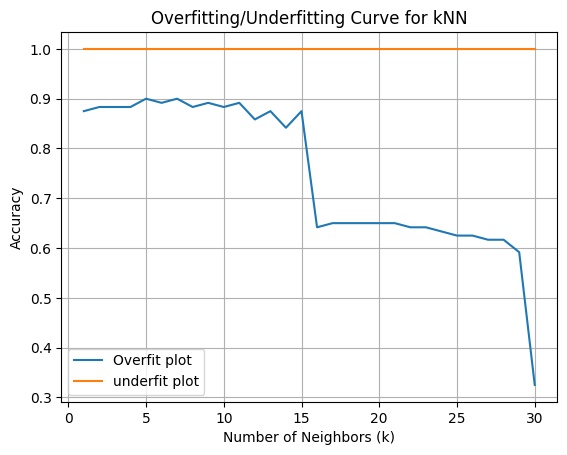

In [125]:
k_values = list(range(1,31))
print(k)#made k values to loop through
test_accuracies = []
split = 0.8 #0.8 seems like it is the highest it will go for a k of 30
for k in k_values:
    test_acc = kmodel(split, k)  #
    test_accuracies.append(test_acc)

plt.plot(k_values, test_accuracies, label="Overfit plot")

#for the underfit
test_accuracies2 = []
split = 0.1 #0.8
for k in k_values:
    test_acc = kmodel(split, k)  #
    test_accuracies2.append(test_acc)

plt.plot(k_values, test_accuracies2, label="underfit plot")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Overfitting/Underfitting Curve for kNN")
plt.legend()
plt.grid(True)
plt.show()